## importing the data into python

In [1]:
# import the librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# import the credit data set into python
credit=pd.read_csv("C:\\Koti\\Workshop\\credit.csv")

# check basic sanity 

In [3]:
credit.shape # number of observations and number of variables

(30000, 25)

In [4]:
list(credit.columns)

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default.payment.next.month']

In [5]:
#checking the data types for each and every variable
credit.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

# we need to check duplicate values both at row and id level

In [6]:
dups=credit.duplicated()

In [7]:
dups.value_counts()

False    30000
dtype: int64

In [8]:
dups1=credit.duplicated(["ID"]) # checking the duplicates at id level

In [9]:
dups1.value_counts()

False    30000
dtype: int64

# print the snapshot of the data

In [10]:
credit.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


# checking the missing values

In [11]:
print(credit.isnull().sum())

ID                             0
LIMIT_BAL                      0
SEX                            0
EDUCATION                      0
MARRIAGE                       0
AGE                            0
PAY_0                          0
PAY_2                          0
PAY_3                          0
PAY_4                          0
PAY_5                          0
PAY_6                          0
BILL_AMT1                      2
BILL_AMT2                      3
BILL_AMT3                      0
BILL_AMT4                      5
BILL_AMT5                      8
BILL_AMT6                      5
PAY_AMT1                      16
PAY_AMT2                      18
PAY_AMT3                       9
PAY_AMT4                       0
PAY_AMT5                       0
PAY_AMT6                      12
default.payment.next.month     0
dtype: int64


In [15]:
credit.loc[credit["BILL_AMT1"].isnull() & credit["PAY_AMT1"].isnull()]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month


# treating the missing values

In [16]:
credit=credit.fillna(method="bfill")

In [17]:
# lets reconfirm is there any missing values in our data
print(credit.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


In [19]:
credit.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


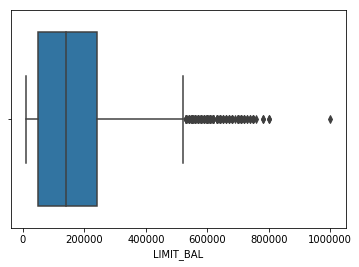

In [20]:
#checking the outliers for LIMIT_BAL variable
sns.boxplot(credit["LIMIT_BAL"])

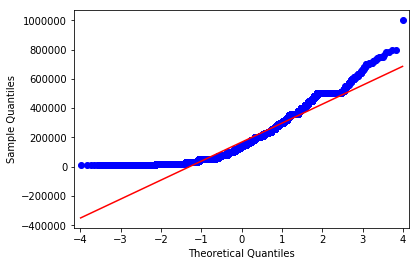

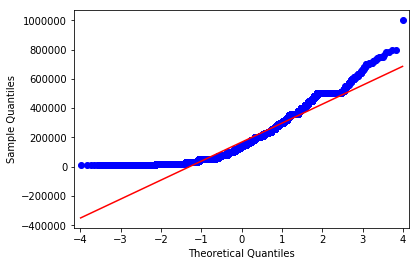

In [22]:
from statsmodels.graphics.gofplots import qqplot
qqplot(credit["LIMIT_BAL"],line="s")

In [24]:
#checking the count of outliers
np.sum(np.where(credit["LIMIT_BAL"]>credit["LIMIT_BAL"].quantile(0.95),1,0))

1475

In [26]:
np.sum(np.where(credit["LIMIT_BAL"]<credit["LIMIT_BAL"].quantile(0.025),1,0))

495

In [27]:
credit["LIMIT_BAL"].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [28]:
credit["LIMIT_BAL"].quantile([0,0.25,0.5,0.75,0.9,0.95,0.997,1])

0.000      10000.0
0.250      50000.0
0.500     140000.0
0.750     240000.0
0.900     360000.0
0.950     430000.0
0.997     600000.0
1.000    1000000.0
Name: LIMIT_BAL, dtype: float64

In [35]:
# creating the user defined function for limit bins
def abc(LIMIT_BAL):
    if LIMIT_BAL>=10000.0 and LIMIT_BAL<=50000.0:
        return "lim_1"
    elif LIMIT_BAL>50000.0 and LIMIT_BAL<=140000.0:
        return "lim_2"
    elif LIMIT_BAL>140000.0 and LIMIT_BAL<=240000.0:
        return "lim_3"
    elif LIMIT_BAL>240000.0 and LIMIT_BAL<=430000.0:
        return "lim_4"
    else:
        return "lim_5"
 

In [36]:
credit["lim_bin"]=credit["LIMIT_BAL"].apply(abc)

In [37]:
credit["lim_bin"].value_counts()

lim_1    7676
lim_3    7643
lim_2    7614
lim_4    5592
lim_5    1475
Name: lim_bin, dtype: int64

In [38]:
# check number of levels
credit.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22722
BILL_AMT2                     22344
BILL_AMT3                     22026
BILL_AMT4                     21545
BILL_AMT5                     21006
BILL_AMT6                     20603
PAY_AMT1                       7941
PAY_AMT2                       7896
PAY_AMT3                       7517
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6937
default.payment.next.month        2
lim_bin                           5
dtype: int64

In [39]:
# drop the LIMIT_BAL variable
credit=credit.drop(["LIMIT_BAL"],axis=1)

In [40]:
credit.shape

(30000, 25)

# checking the outliers for Age varaible


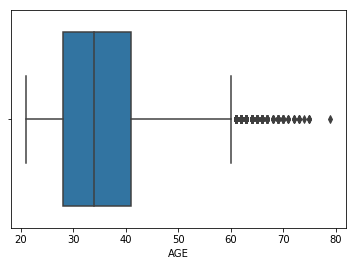

In [41]:
sns.boxplot(credit["AGE"])

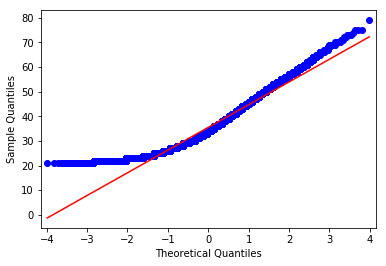

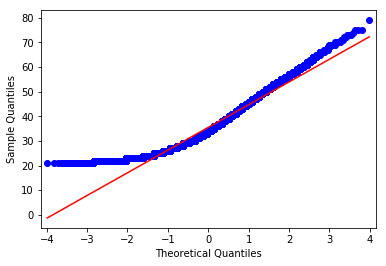

In [42]:
qqplot(credit["AGE"],line="s")

In [48]:
event_rate=(credit["default.payment.next.month"].value_counts()[1]/len(credit))*100
print(event_rate)

22.12


In [50]:
credit.groupby("default.payment.next.month")["BILL_AMT1"].mean()

default.payment.next.month
0    52003.945557
1    48530.485232
Name: BILL_AMT1, dtype: float64

In [52]:
pd.crosstab(credit["lim_bin"],credit["default.payment.next.month"])

default.payment.next.month,0,1
lim_bin,,
lim_1,5236,2440
lim_2,5732,1882
lim_3,6317,1326
lim_4,4781,811
lim_5,1298,177


In [53]:
credit.groupby("lim_bin")["PAY_AMT1"].mean()

lim_bin
lim_1     2268.541428
lim_2     4109.235619
lim_3     6126.628026
lim_4     9390.164342
lim_5    13681.894915
Name: PAY_AMT1, dtype: float64

In [54]:
credit.groupby("default.payment.next.month")["AGE"].mean()

default.payment.next.month
0    35.417266
1    35.725738
Name: AGE, dtype: float64

In [55]:
pd.crosstab(credit["default.payment.next.month"],credit["SEX"])

SEX,1,2
default.payment.next.month,,
0,9015,14349
1,2873,3763


In [56]:
pd.crosstab(credit["EDUCATION"],credit["default.payment.next.month"])

default.payment.next.month,0,1
EDUCATION,,
0,14,0
1,8549,2036
2,10700,3330
3,3680,1237
4,116,7
5,262,18
6,43,8


In [57]:
pd.crosstab(credit["MARRIAGE"],credit["default.payment.next.month"])

default.payment.next.month,0,1
MARRIAGE,,
0,49,5
1,10453,3206
2,12623,3341
3,239,84


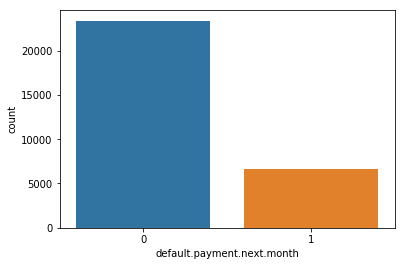

In [58]:
sns.countplot(credit["default.payment.next.month"])